In [1]:
import cv2
from PIL import Image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import string

from keras import layers
from keras.models import Model
from keras.models import load_model
from keras import callbacks

Using TensorFlow backend.
/home/adi/miniconda3/envs/datascience/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/adi/miniconda3/envs/datascience/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/adi/miniconda3/envs/datascience/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/adi/m

In [2]:
# preprocess data
img_shape = (50, 200, 1)
symbols = string.ascii_lowercase + string.digits
n = len(os.listdir('samples')) # 1070 images
num_symbols = 36 # 0 to 9 and A to Z
#print(n)

#create image pix array
x = np.zeros((n, 50, 200, 1))
y = np.zeros((5, n, 36)) # 0 to 9 and A to Z

for i, pic in enumerate(os.listdir('samples')):
        img = cv2.imread(os.path.join('samples', pic), cv2.IMREAD_GRAYSCALE) # direct read as gray scale
        pic_target = pic[:-4]
        if len(pic_target) < 6:
            img = img / 255.0
            img = np.reshape(img, (50, 200, 1))
            targs = np.zeros((5, num_symbols))
            for j, l in enumerate(pic_target):
                ind = symbols.find(l)
                targs[j, ind] = 1
            x[i] = img
            y[:, i] = targs
x_train,y_train = x[:970], y[:, :970]
x_test, y_test = x[970:], y[:, 970:]

        
    

In [3]:
# Creating Model 
img1 = layers.Input(shape=img_shape) # 50 , 200, 1
conv1 = layers.Conv2D(16, (3, 3), padding='same', activation='relu')(img1)
mp1 = layers.MaxPooling2D(padding='same')(conv1)
conv2 = layers.Conv2D(32, (3, 3), padding='same', activation='relu')(mp1)
mp2 = layers.MaxPooling2D(padding='same')(conv2)
conv3 = layers.Conv2D(32, (3, 3), padding='same', activation='relu')(mp2)
bn = layers.BatchNormalization()(conv3)
mp3 = layers.MaxPooling2D(padding='same')(bn)

flat = layers.Flatten()(mp3) # create a flatten vector and get 5 branches each branch for each letter
outs = []
for _ in range(5):
        dens1 = layers.Dense(64, activation='relu')(flat)
        drop = layers.Dropout(0.5)(dens1)
        res = layers.Dense(num_symbols, activation='sigmoid')(drop)
        outs.append(res)
    
    
model = Model(img1, outs)










Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [20]:
# complie the model
model.compile(loss='categorical_crossentropy', optimizer='adam',metrics=["accuracy"])


In [22]:
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            (None, 50, 200, 1)   0                                            
__________________________________________________________________________________________________
conv2d_4 (Conv2D)               (None, 50, 200, 16)  160         input_2[0][0]                    
__________________________________________________________________________________________________
max_pooling2d_4 (MaxPooling2D)  (None, 25, 100, 16)  0           conv2d_4[0][0]                   
__________________________________________________________________________________________________
conv2d_5 (Conv2D)               (None, 25, 100, 32)  4640        max_pooling2d_4[0][0]            
__________________________________________________________________________________________________
max_poolin

In [23]:
# Fitting the Model and Train
hist = model.fit(x_train, [y_train[0], y_train[1], y_train[2], y_train[3], y_train[4]], batch_size=32, epochs=30,verbose=1, validation_split=0.2) # validation data is also there


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Train on 776 samples, validate on 194 samples
Epoch 1/30
776/776 [==============================] - 10s 12ms/step - loss: 17.7263 - dense_12_loss: 3.6072 - dense_14_loss: 3.4997 - dense_16_loss: 3.4983 - dense_18_loss: 3.5321 - dense_20_loss: 3.5891 - dense_12_acc: 0.0425 - dense_14_acc: 0.0451 - dense_16_acc: 0.0451 - dense_18_acc: 0.0399 - dense_20_acc: 0.0477 - val_loss: 28.5711 - val_dense_12_loss: 6.3794 - val_dense_14_loss: 4.7123 - val_dense_16_loss: 5.7792 - val_dense_18_loss: 6.0807 - val_dense_20_loss: 5.6195 - val_dense_12_acc: 0.0464 - val_dense_14_acc: 0.0309 - val_dense_16_acc: 0.0722 - val_dense_18_acc: 0.0258 - val_dense_20_acc: 0.0000e+00
Epoch 2/30
776/776 [==============================] - 3s 4ms/step - loss: 16.5587 - dense_12_loss: 3.3886 - dense_14_loss: 3.3011 - dense_16_loss: 3.2907 - dense_18_loss: 3.2703 - dense_20_loss: 3.3080 - dense_12_acc: 0.0619 - dense_14_acc: 0

Epoch 14/30
776/776 [==============================] - 3s 4ms/step - loss: 10.7518 - dense_12_loss: 1.9471 - dense_14_loss: 1.9543 - dense_16_loss: 2.3572 - dense_18_loss: 2.2586 - dense_20_loss: 2.2346 - dense_12_acc: 0.2126 - dense_14_acc: 0.2397 - dense_16_acc: 0.1353 - dense_18_acc: 0.2049 - dense_20_acc: 0.1894 - val_loss: 9.2541 - val_dense_12_loss: 1.2868 - val_dense_14_loss: 1.5737 - val_dense_16_loss: 2.1963 - val_dense_18_loss: 2.0040 - val_dense_20_loss: 2.1934 - val_dense_12_acc: 0.4330 - val_dense_14_acc: 0.3711 - val_dense_16_acc: 0.1546 - val_dense_18_acc: 0.1701 - val_dense_20_acc: 0.1701
Epoch 15/30
776/776 [==============================] - 3s 4ms/step - loss: 10.1314 - dense_12_loss: 1.7435 - dense_14_loss: 1.8908 - dense_16_loss: 2.2413 - dense_18_loss: 2.1485 - dense_20_loss: 2.1074 - dense_12_acc: 0.3299 - dense_14_acc: 0.2500 - dense_16_acc: 0.1495 - dense_18_acc: 0.2204 - dense_20_acc: 0.1881 - val_loss: 7.8212 - val_dense_12_loss: 0.8582 - val_dense_14_loss: 1.

In [4]:
# Predict Logic
def predict_captcha(fileName):
    img = cv2.imread(fileName, cv2.IMREAD_GRAYSCALE)
    if img is not None:
        img = img/255.0
    else: print('Not Detected')
    res = np.array(model.predict(img[np.newaxis, :, :, np.newaxis]))
    ans = np.reshape(res, (5, 36))
    l_ind = []
    probs = []
    for a in ans:
        l_ind.append(np.argmax(a))
    capt = ''
    for l in l_ind:
        capt += symbols[l]
    return capt


In [39]:
model.save('CaptchaModelNew.hdf5')

In [5]:
model = load_model('CaptchaModelNew.hdf5')


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [6]:
# evaluation matrix 
score = model.evaluate(x_test, [y_test[0], y_test[1], y_test[2], y_test[3], y_test[4]],verbose=1)
print('Test Loss and accuracy: ', score)

100/100 [==============================] - 1s 8ms/step
Test Loss and accuracy:  [1.7610865116119385, 0.020157677680253984, 0.12425231337547302, 0.5754075384140015, 0.7003580069541931, 0.34091094255447385, 1.0, 0.97, 0.83, 0.78, 0.88]


In [8]:
model.evaluate(x_test, [y_test[0], y_test[1], y_test[2], y_test[3], y_test[4]])
print(predict_captcha('samples/5nggg.png'))


100/100 [==============================] - 0s 2ms/step
5nggg


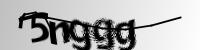

In [7]:
img = cv2.imread('samples/5nggg.png')
Image.fromarray(img)